In [1]:
pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fahlevi20","key":"7e6bde51e6a2e4c7c6a8ccbae9a70f4c"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d andrewmvd/animal-faces

 98% 684M/696M [00:04<00:00, 136MB/s]
100% 696M/696M [00:04<00:00, 151MB/s]


In [5]:
# unzip
!unzip animal-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/fl

In [37]:
import os

In [38]:
base_dir='/content/afhq'
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')


In [39]:
os.listdir(train_dir)


['wild', 'dog', 'cat']

In [40]:
os.listdir(val_dir)

['wild', 'dog', 'cat']

In [41]:
train_wild_dir = os.path.join(train_dir,"wild")
train_cat_dir = os.path.join(train_dir,"cat")
train_dog_dir = os.path.join(train_dir,"dog")

validat_paper_dir = os.path.join(val_dir,"wild")
validat_scissors_dir = os.path.join(val_dir,"Cat")
validat_rock_dir = os.path.join(val_dir,"dog")

In [42]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [43]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
train_gene=datagen.flow_from_directory(
    train_dir,
    subset='training',
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,)
val_gene=datagen.flow_from_directory(
    val_dir,
    subset='validation',
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,
    )



Found 11706 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [44]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),

      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(3,activation='softmax')
  
])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)      

In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=3e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
cb=[EarlyStopping(monitor='loss',mode='min',patience=5,restore_best_weights=True)]

In [49]:
history=model.fit(
    train_gene,
    steps_per_epoch=25,
    epochs=40,
    validation_data=val_gene,
    verbose=1,
    callbacks=[cb])

Epoch 1/40
25/25 [==============================] - 125s 5s/step - loss: 1.0910 - accuracy: 0.3800 - val_loss: 1.0492 - val_accuracy: 0.5267
Epoch 2/40
25/25 [==============================] - 103s 4s/step - loss: 1.0010 - accuracy: 0.4925 - val_loss: 0.9067 - val_accuracy: 0.6200
Epoch 3/40
25/25 [==============================] - 103s 4s/step - loss: 0.7089 - accuracy: 0.7113 - val_loss: 0.7122 - val_accuracy: 0.6933
Epoch 4/40
25/25 [==============================] - 103s 4s/step - loss: 0.5517 - accuracy: 0.7750 - val_loss: 0.5486 - val_accuracy: 0.7867
Epoch 5/40
25/25 [==============================] - 102s 4s/step - loss: 0.4938 - accuracy: 0.8062 - val_loss: 0.5180 - val_accuracy: 0.8100
Epoch 6/40
25/25 [==============================] - 104s 4s/step - loss: 0.4510 - accuracy: 0.8225 - val_loss: 0.4798 - val_accuracy: 0.8167
Epoch 7/40
25/25 [==============================] - 103s 4s/step - loss: 0.3804 - accuracy: 0.8487 - val_loss: 0.3868 - val_accuracy: 0.8567
Epoch 8/40
25

In [50]:
import matplotlib.pyplot as plt


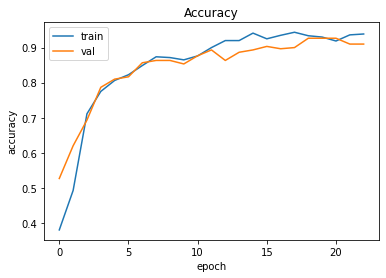

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


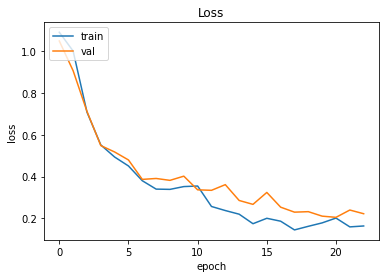

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with tf.io.gfile.GFile('model.tflite','wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpv2fe_d_m/assets


In [54]:
!ls -la | grep 'model'


-rw-r--r-- 1 root root  38724844 Sep 17 06:53 model.tflite
